<a href="https://colab.research.google.com/github/martimov/MoniTARE/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

(1080, 1920, 3)


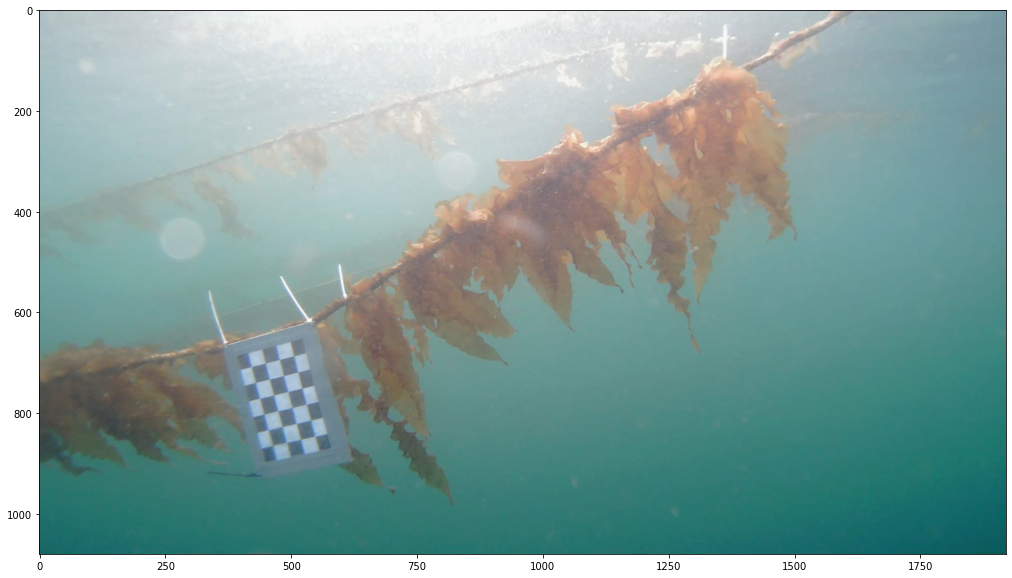

In [4]:
# Load an image and display
imgPath = '/video_BYEDP210102_2022-03-22_095346_wideshot.mp4_snapshot_00.10.663.jpg'
img = cv.imread(imgPath, cv.IMREAD_COLOR)

# Convert to grayscale
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Display image
plt.imshow(img[:, :, ::-1]);
print(img.shape)

# Perspective correction

In [ ]:
# findchessboardcorners
# rectify into a perfect rectangle

In [7]:
################ FIND CHESSBOARD CORNERS - OBJECT POINTS AND IMAGE POINTS #############################

chessboardSize = (6, 4)
frameSize = (1920, 1080)

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

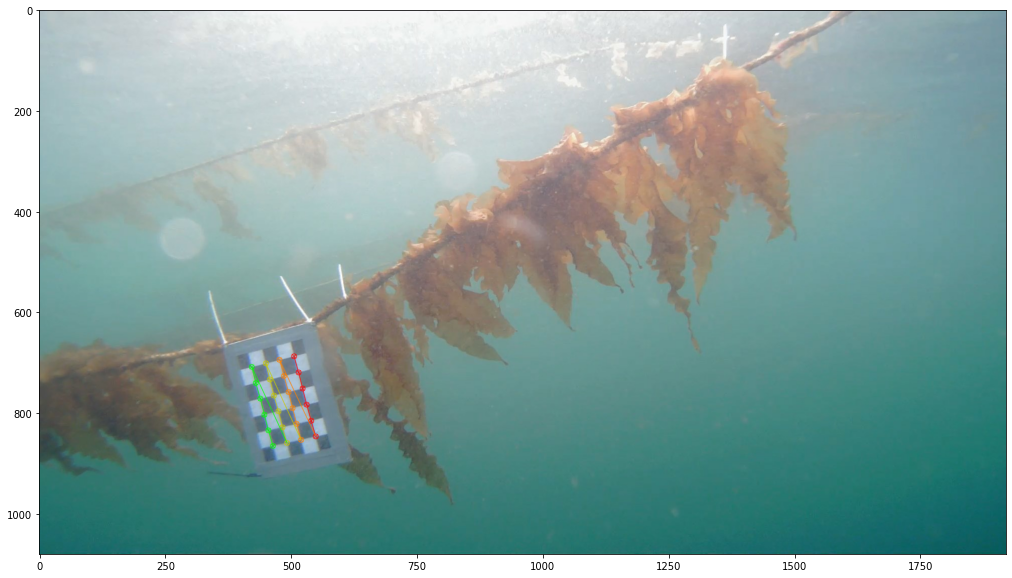

In [8]:
# Find the chess board corners
ret, corners = cv.findChessboardCorners(imgGray, chessboardSize, None)

# If found, add object points, image points (after refining them)
if ret == True:
  objpoints.append(objp)
  
  corners = cv.cornerSubPix(imgGray, corners, (11,11), (-1,-1), criteria)
  imgpoints.append(corners)
  # Draw and display the corners
  cv.drawChessboardCorners(img, chessboardSize, corners, ret)
  plt.imshow(img[:, :, ::-1]);